In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# loading the dataset

In [2]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## counting the target variable

In [3]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.shape


(8124, 23)

In [6]:
# finding the null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### There are no null values


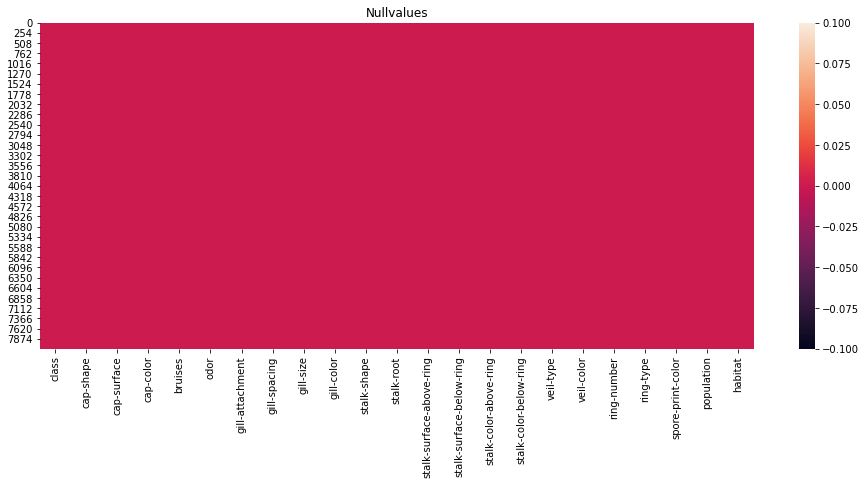

In [7]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

### Finding the unique values in the target

In [103]:
 df['class'].unique()

array([1, 0])

In [104]:
count=df['class'].value_counts()
count

0    3488
1    3080
Name: class, dtype: int64

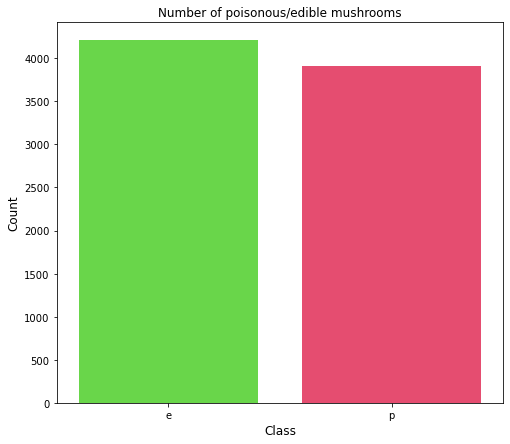

In [10]:
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

## poisoinous represented with p, edible represents e



## Representing with categorical plot and finding  which are edible and poisonous

<Figure size 1368x432 with 0 Axes>

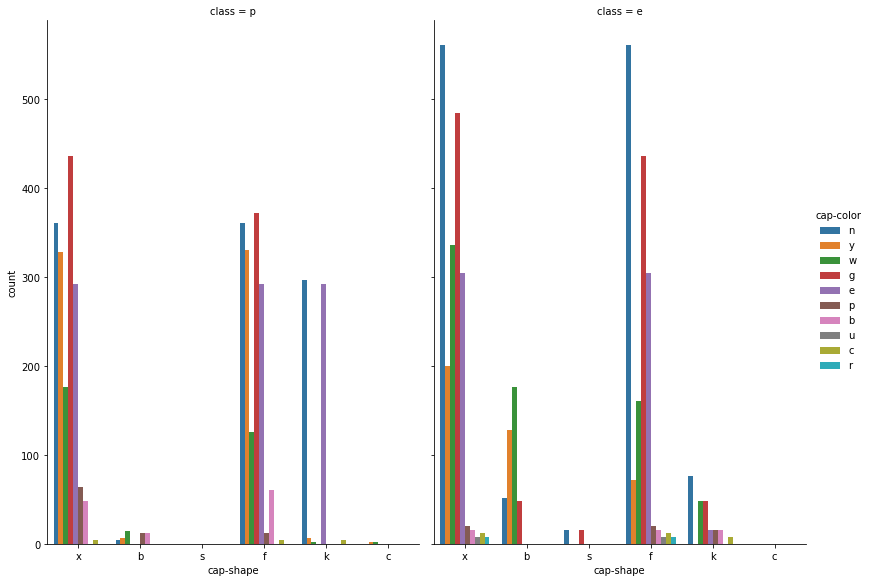

In [11]:
plt.figure(figsize = (19, 6))
g = sns.catplot(x="cap-shape",hue="cap-color",col="class",data=df,kind="count",height=8,aspect=0.7)

### from b-->bell shaped capshape it is noticed that (green coloured represents white) is high that isWhite Coloured and Bell Shaped Mushrooms are highly recommended for eating


### from k---->knobbed shaped it is noticed that (purple color represents red) from the attributes so #Red Coloured Knobbed Shaped Mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

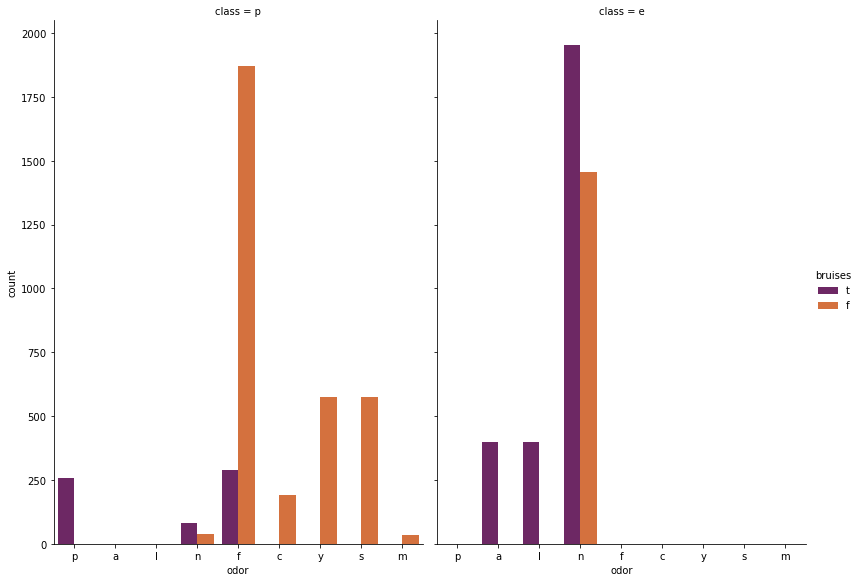

In [12]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'inferno')

#### Odourless and Bruised Mushrooms are highly recommended for eating
#####Fishy Odour with No Bruises Mushrooms are poisonous

<Figure size 1008x432 with 0 Axes>

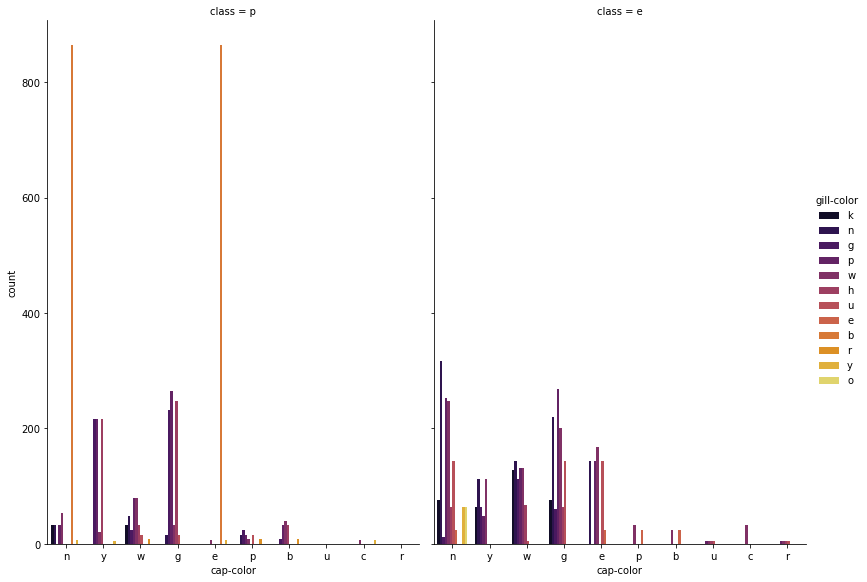

In [13]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="cap-color", hue="gill-color", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'inferno')

#### red,brown capcolors, buff gillcolor are poisonous

# converting all categorical values into numerical by label encoder

In [106]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [107]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,5,0,0,1,3,...,2,2,3,3,0,0,3,1,3,5
1,0,5,2,9,1,0,0,0,0,3,...,2,2,3,3,0,0,3,2,2,1
2,0,0,2,8,1,3,0,0,0,4,...,2,2,3,3,0,0,3,2,2,3
3,1,5,3,8,1,5,0,0,1,4,...,2,2,3,3,0,0,3,1,3,5
4,0,5,2,3,0,4,0,1,0,3,...,2,2,3,3,0,0,0,2,0,1


In [17]:
# represents veil-type nothing and dropping 
df=df.drop(["veil-type"],axis=1)

In [18]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [19]:
# finding the correlation
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


# correlation heatmap 

Text(0.5, 1.0, 'Correlation Heatmap')

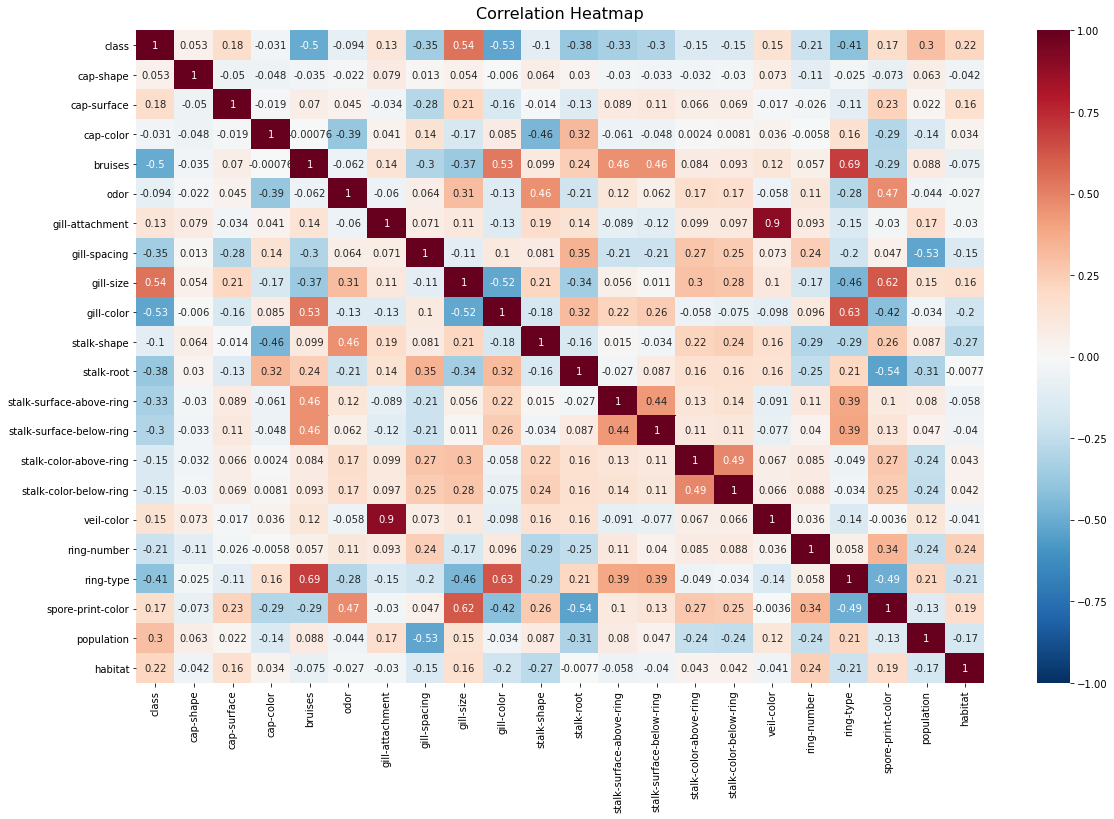

In [20]:
plt.figure(figsize = (19, 12))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap='RdBu_r', annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 16}, pad = 12)

### From the correlation gill-size is highly correlated,gill color,bruises is least correlated


In [21]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
# describing the data with heatmap

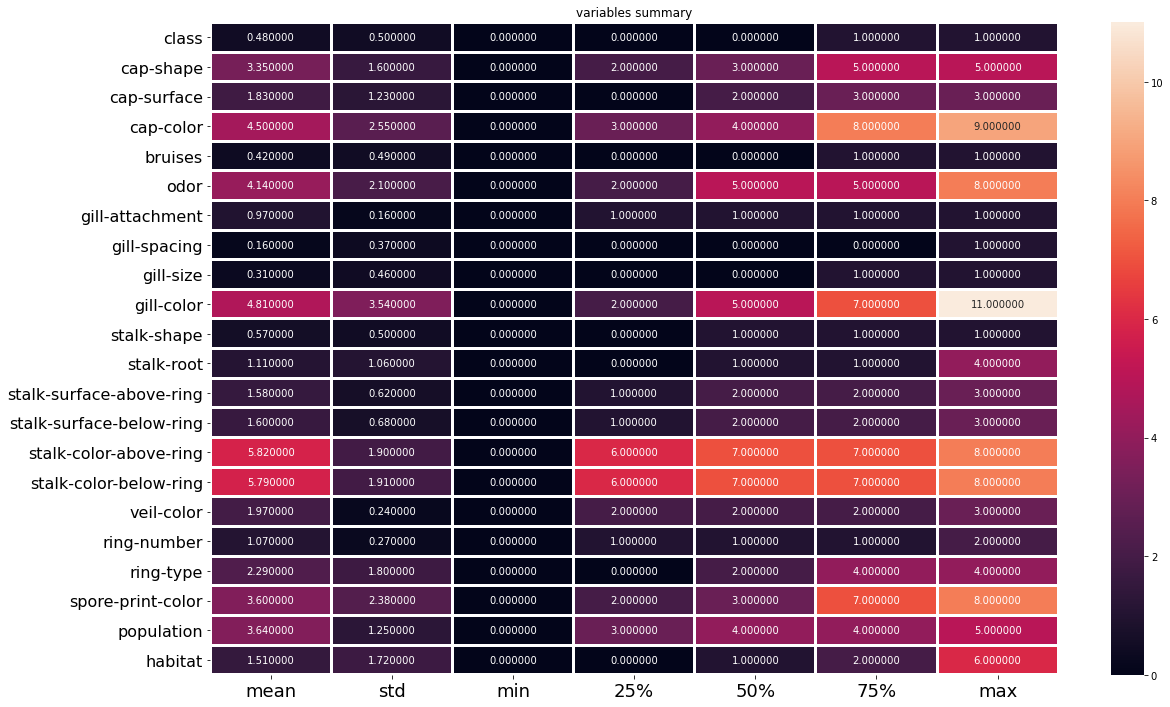

In [22]:
plt.figure(figsize = (19, 12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot = True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("variables summary")
plt.show()

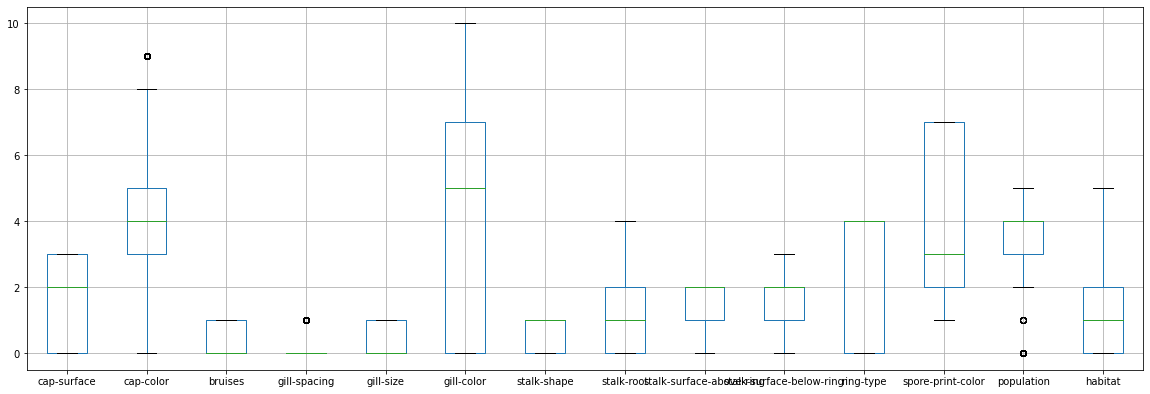

In [51]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

## checking the outliers with boxplot

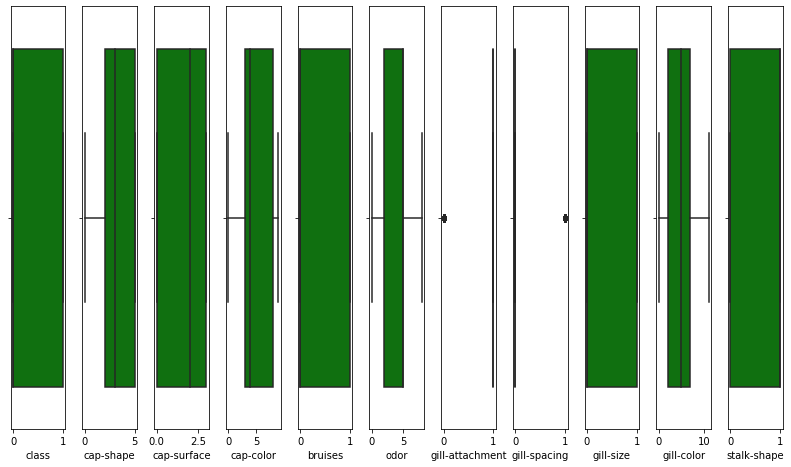

In [23]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,11):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

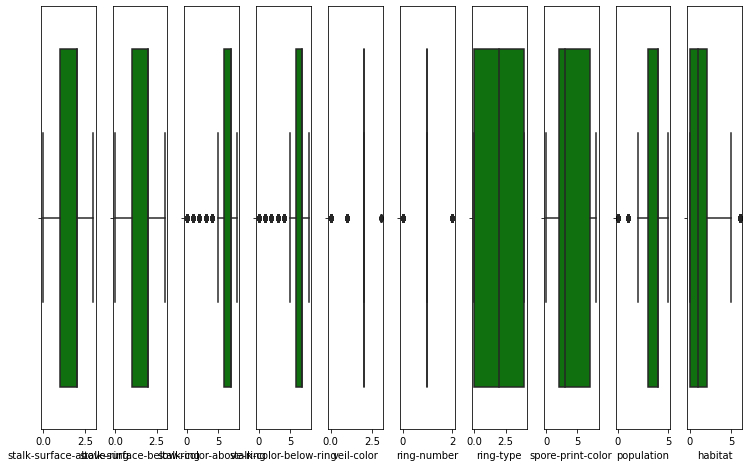

In [24]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(12,22):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

### There are few outliers present inthe stalkcolor above ring and below ring

In [25]:
# checking the skewness of the data
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [ ]:
#distribution plot

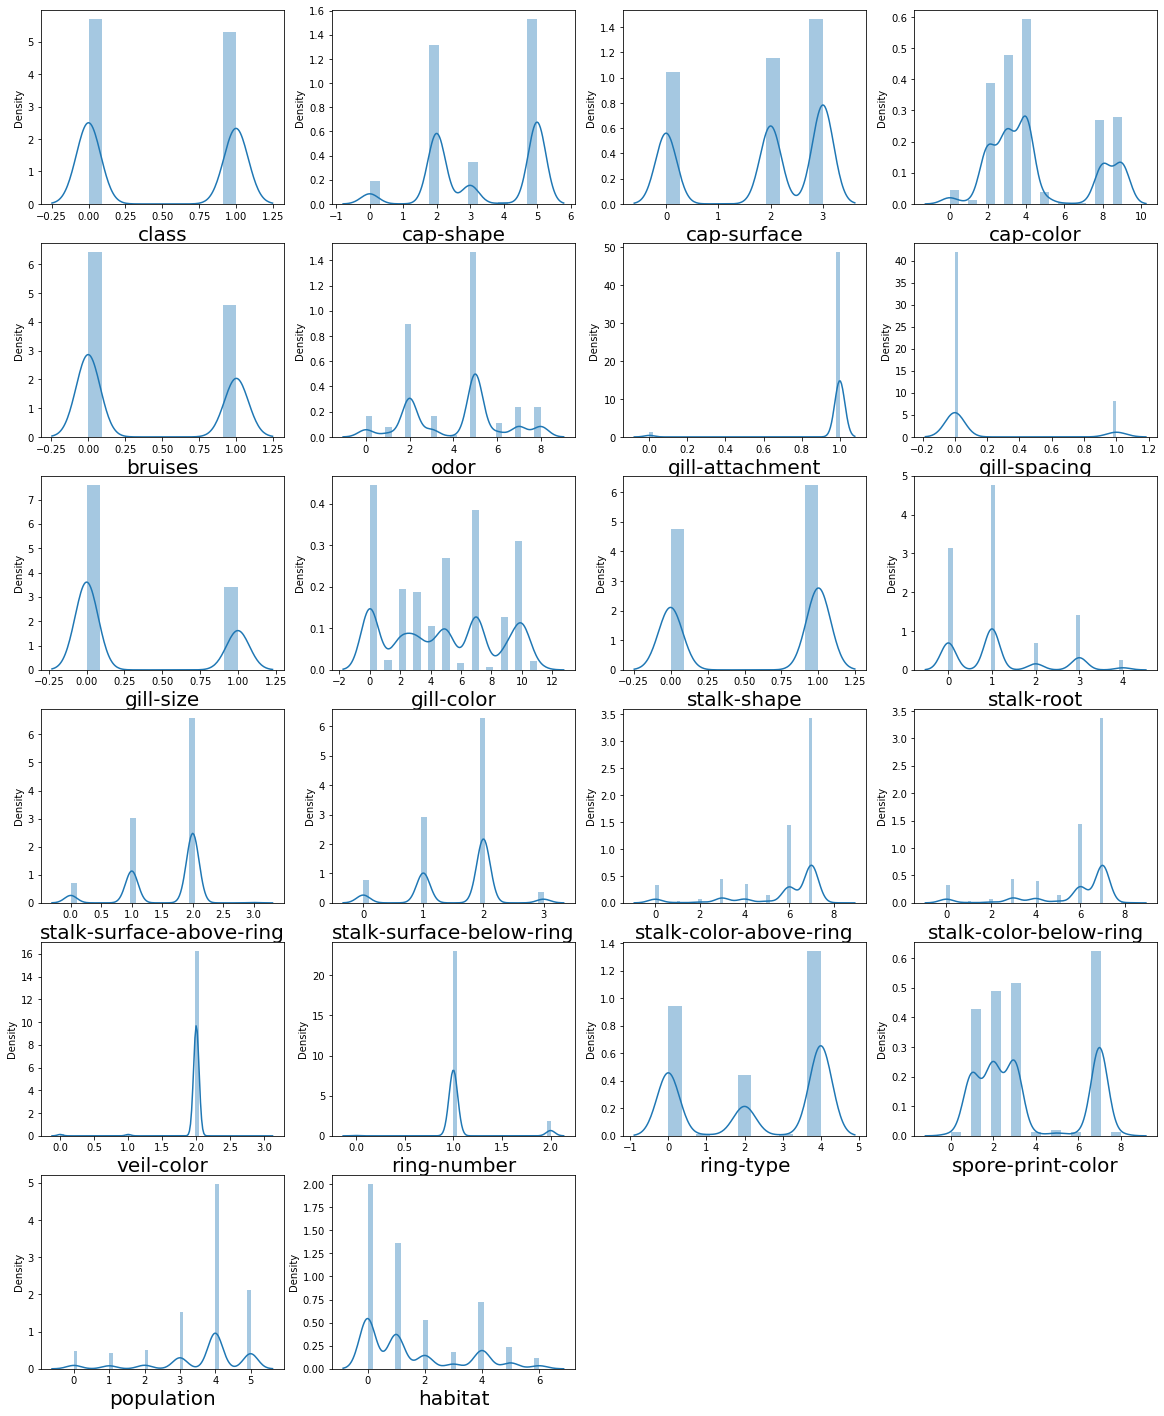

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber <=24:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()        

## By distribution plot all plots are normally distributed

In [28]:
# Removing the outliers with zscore
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
print(z)

[[1.0366127  1.02971224 0.14012794 ... 0.67019486 0.5143892  2.03002809]
 [0.96468045 1.02971224 0.14012794 ... 0.2504706  1.31310821 0.29572966]
 [0.96468045 2.08704716 0.14012794 ... 0.2504706  1.31310821 0.86714922]
 ...
 [0.96468045 0.8403434  0.14012794 ... 1.50964337 2.11182722 0.28570978]
 [1.0366127  0.21699152 0.95327039 ... 1.42842641 0.28432981 0.28570978]
 [0.96468045 1.02971224 0.14012794 ... 0.16925365 2.11182722 0.28570978]]


In [32]:
print('Row numbers   \n',np.where(z>3)[0])
print('\n\n column numbers\n',np.where(z>3)[1] )

Row numbers   
 [1816 2128 2128 ... 8121 8123 8123]


 column numbers
 [15 14 15 ... 16  6 16]


In [33]:
index = (np.where(z>3)[0])

In [34]:
df = df.drop(df.index[index])
df.shape

(6568, 22)

In [35]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### Separating the features and labels

In [36]:
x=df.drop('class',axis=1)
y=df["class"]

In [ ]:
x

In [ ]:
y

In [39]:
#checking the skewness of features
x.skew()

cap-shape                  -0.234646
cap-surface                -0.630373
cap-color                   0.811934
bruises                     0.124508
odor                       -0.172451
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                  0.048010
stalk-shape                -0.881319
stalk-root                  0.777382
stalk-surface-above-ring   -1.381335
stalk-surface-below-ring   -0.989929
stalk-color-above-ring     -1.776145
stalk-color-below-ring     -1.681096
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.231353
spore-print-color           0.697445
population                 -1.737467
habitat                     0.987162
dtype: float64

### Removing the skewness with powertransform 

In [40]:
# importing power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [41]:
df_new.skew()

cap-shape                  -0.200903
cap-surface                -0.490817
cap-color                   0.004509
bruises                     0.124508
odor                       -0.181236
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                 -0.264544
stalk-shape                -0.881319
stalk-root                  0.005239
stalk-surface-above-ring   -0.877047
stalk-surface-below-ring   -0.144083
stalk-color-above-ring     -0.788774
stalk-color-below-ring     -0.682354
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.278488
spore-print-color           0.055683
population                 -0.328966
habitat                     0.180444
dtype: float64

### Feature selection with spercentile

In [42]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2


In [111]:
spercentile= SelectPercentile(score_func=chi2,percentile=80)
spercentile = spercentile.fit(x,y)

In [112]:
cols = spercentile.get_support(indices=True)
features = x.columns[cols]

In [113]:
df_scores = pd.DataFrame({'features':x.columns,'chi2score':spercentile.scores_,'pvalue':spercentile.pvalues_})
df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
5,gill-color,6282.363470,0.000000e+00
10,ring-type,2073.188999,0.000000e+00
11,spore-print-color,1958.295488,0.000000e+00
7,stalk-root,1908.797253,0.000000e+00
4,gill-size,1740.409073,0.000000e+00
13,habitat,1600.649562,0.000000e+00
2,bruises,1038.114790,9.324760e-228
3,gill-spacing,548.233871,3.049271e-121
0,cap-surface,292.717373,1.271964e-65
1,cap-color,128.332592,9.492545e-30


#### taking into 80% features 

In [114]:
print(cols)
print(features)

[ 0  1  2  3  4  5  7  9 10 11 13]
Index(['cap-surface', 'cap-color', 'bruises', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-root', 'stalk-surface-below-ring', 'ring-type',
       'spore-print-color', 'habitat'],
      dtype='object')


In [115]:
x=df[features]
y=df["class"]

In [68]:
#data scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)



### Best random state for model_prediction

In [77]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf = lr.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"in randomstate",maxRs)        

best accuracy is 0.9736174530695079 in randomstate 312


In [78]:
#splitting the data 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=312)


# LogisticRegression model training

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
target_names = ['class 0','class 1']
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr,target_names=target_names))

0.9736174530695079
[[1009   30]
 [  22  910]]
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.97      1039
     class 1       0.97      0.98      0.97       932

    accuracy                           0.97      1971
   macro avg       0.97      0.97      0.97      1971
weighted avg       0.97      0.97      0.97      1971



# DecisionTreeClassifier model training

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
target_names = ['class 0','class 1']
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt,target_names=target_names,))

1.0
[[1039    0]
 [   0  932]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      1039
     class 1       1.00      1.00      1.00       932

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



# SVM model training

In [86]:
from sklearn.svm import SVC

sv= SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
target_names = ['class 0','class 1']
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv,target_names=target_names))

1.0
[[1039    0]
 [   0  932]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      1039
     class 1       1.00      1.00      1.00       932

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



# RandomForestClassifier model training

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
target_names = ['class 0','class 1']
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,target_names=target_names))

1.0
[[1039    0]
 [   0  932]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      1039
     class 1       1.00      1.00      1.00       932

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



# cross validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation for logistic regression is",scr.mean()*100)

cross validation for logistic regression is 90.7903983232886


In [92]:
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation for decision tree is",scr.mean()*100)

cross validation for decision tree is 97.28960251135757


In [93]:
scr=cross_val_score(sv,x,y,cv=5)
print("cross validation for support vectore machines is",scr.mean()*100)

cross validation for support vectore machines is 90.97301194819165


In [94]:
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation for randomforest is",scr.mean()*100)

cross validation for randomforest is 94.64120068487354


# Hyper tuning for decision tree classifier using grid search

In [97]:
from sklearn.model_selection import GridSearchCV

In [95]:
grid_params={'max_depth':range(4,12,2),
             'min_samples_split':range(4,8,2),
             'splitter':('best', 'random'),
             'max_features':('auto', 'sqrt', 'log2'),
             'criterion':('gini', 'entropy')}


In [98]:
grd_src=GridSearchCV(dt,param_grid=grid_params)
grd_src.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(4, 12, 2),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': range(4, 8, 2),
                         'splitter': ('best', 'random')})

In [99]:
grd_src.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=4)

In [100]:
grdr =  DecisionTreeClassifier(max_depth=10,min_samples_split=4,max_features='auto')
grdr.fit(x_train,y_train)
y_pred = grdr.predict(x_test)
print('*********accuracy post tuning********')
print(metrics.r2_score(y_test,y_pred)*100)

*********accuracy post tuning********
100.0


# saving the model

In [102]:
import joblib
joblib.dump(dt,'projectmushroom.pkl')

['projectmushroom.pkl']

### Attributes of mushrooms 

In [ ]:
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u 
veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d    